# Sampling Distribution

A **sampling distribution** is a probability distribution of a statistic (like the mean, median, or proportion) calculated from multiple random samples of the same size drawn from a specific population. It helps us understand the behavior of a statistic and make inferences about the population based on sample data.

The **Central Limit Theorem (CLT)** states that distribution of a sample distribution will be approximately normal, regardless of the original population distribution, as long as the sample size is sufficiently large. This means that even if the population data isn't normally distributed, the distribution of sample means will tend towards a normal distribution as the sample size increases. <br>
A good rule of thumb is that if the sample distribution size is greater than or equal to 30, then the distribution will be normal.

# Example

A company has been in business for the last year and has been receiving a certain number of help calls per hours. The call center has 6 employees that cover a shift, and each employee can take 4 calls an hour. From a sample from the last month, we would like to determine if the average number of calls per hours is greater than 10. We do not know the distribution of the number of calls per hour.

1. We construct the population data.
2. We will obtain a sample of that data
3. We will conduct hypothesis testing
4. We will compare to the true population parameter

## Step 1 - Contstruct the population data
We don't know this population so we are not going to use any of the information used to contsruct the popluation until Step 4

In [401]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
from scipy.stats import norm
import matplotlib.pyplot as plt
N = 24*365
theLambda = 10.35
X = poisson.rvs(theLambda, size = N)
#X = norm.rvs(theLambda,30,size = N)

## Step 2 - Obtain a sample of a months worth of data
In order to get a months worth of samples, there are 24 hours in a day and 30 days in the months so we need 720 samples. From that we get a sample distributions of the means.

In [402]:
numHoursPerDay=24
numDays=30
numSamples = numHoursPerDay*numDays;
x=X[0:numSamples];
n=np.linspace(0,numSamples,1);
sampMean = np.zeros(numDays);
for i in range(0,numDays):
    startIndex=i*numHoursPerDay
    index=np.linspace(0,numHoursPerDay-1,numHoursPerDay,dtype=int)+startIndex
    sampMean[i]=np.mean(x[index])


Visualize the sample distribution of $\bar{x}$

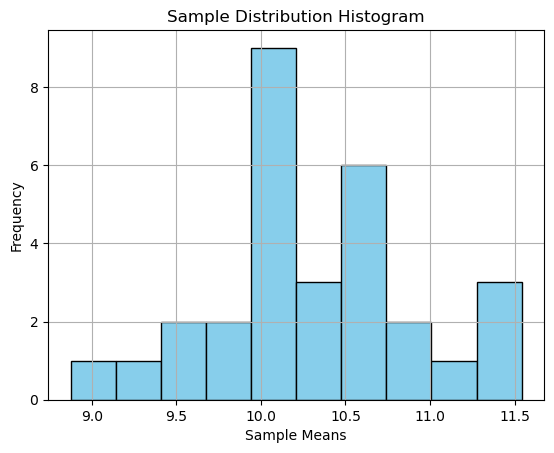

In [438]:
plt.hist(sampMean,color='skyblue', edgecolor='black')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.title('Sample Distribution Histogram')
plt.grid()
plt.show()

In [404]:
x_bar = np.mean(sampMean)
s2 = np.sum((sampMean-x_bar)**2)/(numDays-1)
print(x_bar)
print(np.sqrt(s2))
results = pd.Series(sampMean)
results.describe()

10.311111111111112
0.6242556231337035


count    30.000000
mean     10.311111
std       0.624256
min       8.875000
25%       9.958333
50%      10.229167
75%      10.666667
max      11.541667
dtype: float64

## Step 3 - Hypotheses Testing

The null hypothesis is that $\bar{x}$ is less than 10
$$H_0 : \bar{x} \leq 10 $$
$$H_1 : \bar{x} > 10 $$

In [481]:
alpha = 0.025
paramGuess = 10
std_error = np.sqrt(s2/numDays)

Z = (x_bar-paramGuess)/std_error
z_criticalValue = -1*(norm.ppf(alpha)) #the one sided rejection region is on the right so the critical value must be positive
print("The Z-score is: "+str(Z))
print("The critical value is is: "+str(z_criticalValue))
# Calculate the p-value
beta= norm.cdf((Z));
p_value = (1 - beta)
print("The P-value is: "+str(p_value)) 

The Z-score is: 2.7296922467537805
The critical value is is: 1.9599639845400545
The P-value is: 0.0031696737346517123


In [482]:

if(p_value < alpha):
    print(f"At the {round(p_value*100,2)}% significance level, we reject the null hypothesis")
    print(f"We are {round(beta*100,2)} % sure that the average number of calls per hours is greater than {paramGuess}")
else:#Accept the null hypothesis
    print(f"There is insufficient evidence to reject the claim that the number of call per hours is less than or equal to {paramGuess} with more than {round((1-alpha)*100,2)}% confidence")
    #print(f"We are {round((1-alpha)*100,2)} % sure that the average number of calls per hours is less than or equal to {paramGuess}")

mean_error = abs(norm.ppf(alpha/2))*std_error;
CI_low = x_bar - mean_error
CI_high = x_bar + mean_error

print(f"We are {round((1-alpha)*100,2)} confident that the true average calls per hours is in between [{CI_low} , {CI_high} ]")

At the 0.32% significance level, we reject the null hypothesis
We are 99.68 % sure that the average number of calls per hours is greater than 10
We are 97.5 confident that the true average calls per hours is in between [10.055651802882528 , 10.566570419339696 ]


## Step 4 - Compare to true population parameter

In [483]:
popMean = np.mean(X)
print(f"The true average number of calls per hours is: {popMean}")

The true average number of calls per hours is: 10.316552511415525
